In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/Users/prabin/Project_works/energy consumption in smart homes./smart_home_energy_consumption.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  2024-03-14 06:00:00   Home_8    Lucknow                    3.14          1   
1  2024-04-06 06:00:00   Home_9  Hyderabad                    4.70          1   
2  2024-01-30 13:00:00   Home_4    Lucknow                    2.27          0   
3  2024-03-05 12:00:00   Home_5  Ahmedabad                    0.80          0   
4  2024-01-19 00:00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3                   0.55  
4                   0.94

In [4]:
print("Dataset Structure:")
print(data.shape)

Dataset Structure:
(2500, 10)


In [5]:
print("Data Types:")
print(data.dtypes)

Data Types:
Date                       object
Home_ID                    object
City                       object
Energy_Consumption_kWh    float64
Occupancy                   int64
Temperature_C             float64
Humidity_%                float64
HVAC_Usage_kWh            float64
Kitchen_Usage_kWh         float64
Electronics_Usage_kWh     float64
dtype: object


In [7]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64


In [8]:
print("Basic Statistics:")
print(data.describe())

Basic Statistics:
       Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2450.000000  2500.000000    2450.000000  2450.000000   
mean                 3.515151     0.696000      23.949718    59.877824   
std                  1.373759     0.460075       5.245470    14.790739   
min                 -0.670000     0.000000       7.260000     8.190000   
25%                  2.680000     0.000000      20.432500    49.725000   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.310000     1.000000      27.450000    69.770000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2450.000000        2500.000000            2500.000000  
mean         1.009151           0.799344               0.510372  
std          0.508385           0.405211               0.297242  
min         -1.030000          -0.650000           

In [9]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64


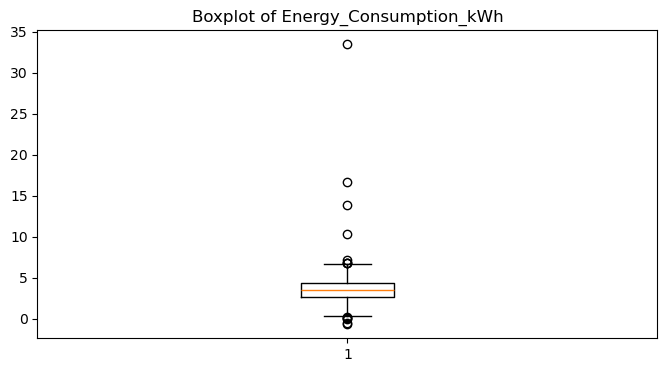

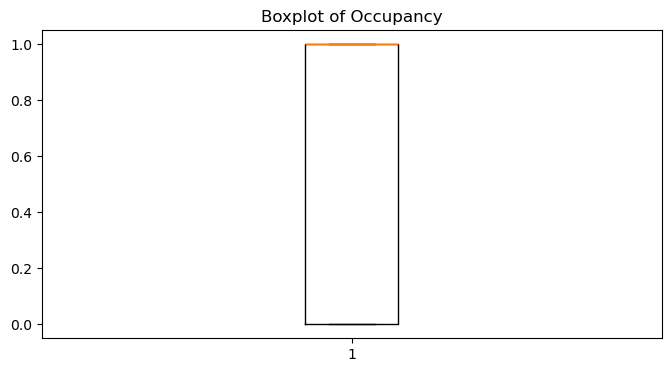

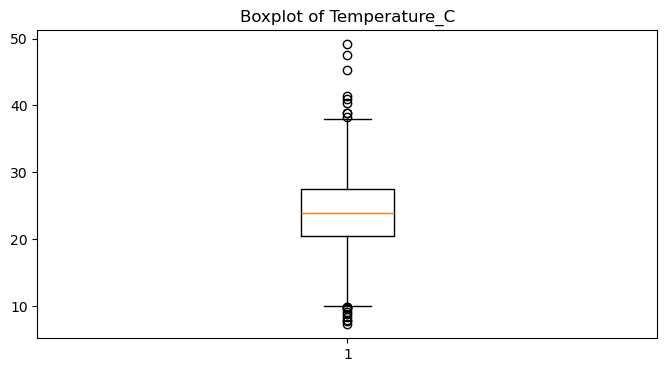

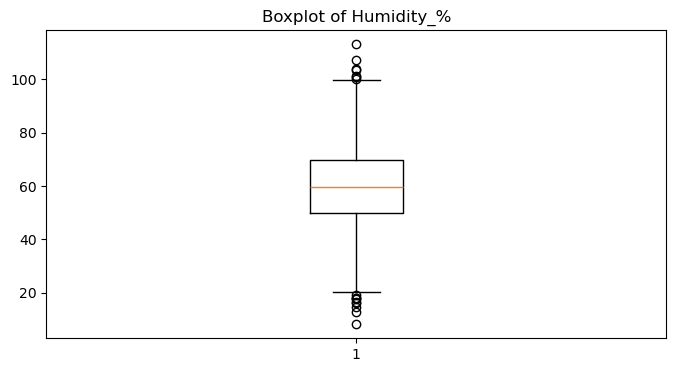

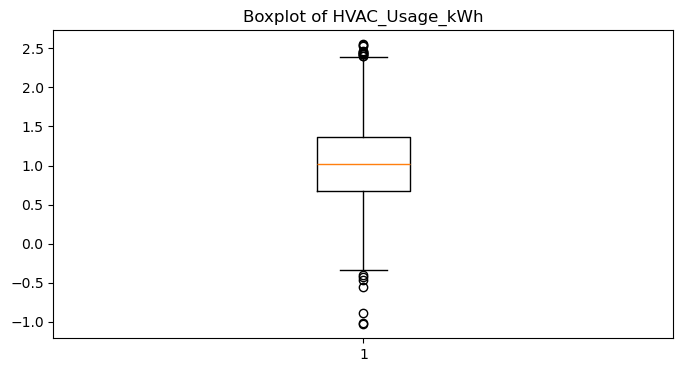

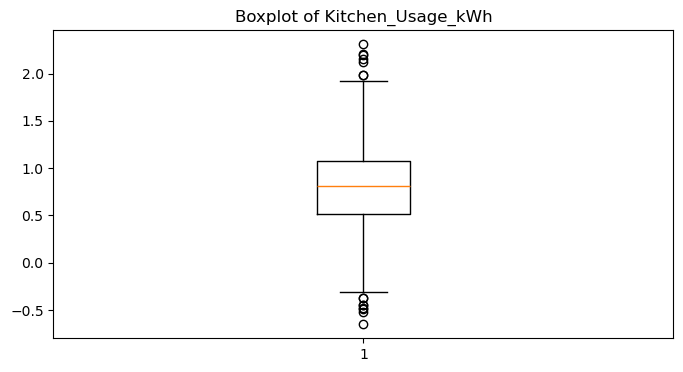

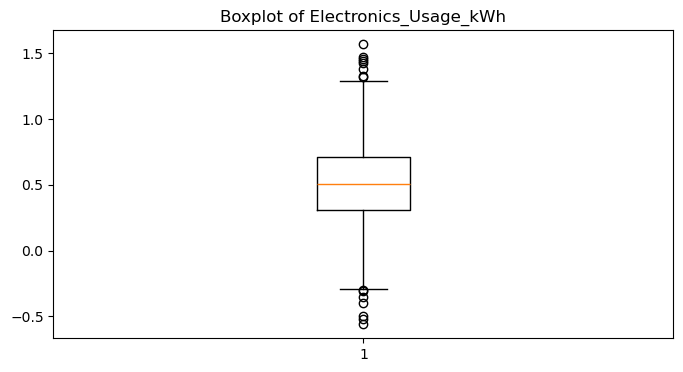

In [10]:
# Step 2: Detect Outliers using Boxplots
# Assumed 'Column1' is a numerical column to check for outliers
numerical_columns = data.select_dtypes(include=[np.number]).columns  # Selecting only numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(data[column].dropna())  # Droped NaN values for better plotting
    plt.show()

In [12]:
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutliers in {column}:")
        print(outliers[[column]])


Outliers in Energy_Consumption_kWh:
      Energy_Consumption_kWh
25                      0.10
82                     33.48
182                    13.93
561                    -0.49
829                    -0.67
1276                   16.63
1572                    0.23
1610                    6.82
1622                    0.02
1806                    7.17
1959                    6.76
2102                    6.78
2406                    0.05
2455                   10.30

Outliers in Temperature_C:
      Temperature_C
17             9.74
98             9.81
119            7.73
316           47.52
329            7.26
345            7.92
401           49.14
580            8.42
798            9.58
851            8.84
1334          40.38
1423           9.05
1440          40.99
1498          38.90
1549          41.44
1828          38.31
1850          45.30
2120           9.84
2358          38.93

Outliers in Humidity_%:
      Humidity_%
328        17.94
338       101.44
814       103.37
929    

In [13]:
for column in numerical_columns:
    if (data[column] < 0).any():
        print(f"\nInconsistent values (negative numbers) detected in {column}:")
        print(data[data[column] < 0][[column]])


Inconsistent values (negative numbers) detected in Energy_Consumption_kWh:
     Energy_Consumption_kWh
561                   -0.49
829                   -0.67

Inconsistent values (negative numbers) detected in HVAC_Usage_kWh:
      HVAC_Usage_kWh
2              -0.22
144            -0.04
209            -0.17
224            -0.02
230            -0.06
252            -0.01
359            -0.04
361            -0.25
385            -0.88
429            -0.01
447            -0.18
632            -0.25
662            -0.30
744            -0.07
817            -0.55
889            -0.10
926            -0.08
952            -0.43
1003           -0.27
1043           -0.14
1161           -0.09
1221           -0.16
1235           -0.01
1378           -0.22
1384           -0.23
1395           -0.11
1427           -0.32
1428           -0.09
1474           -0.08
1552           -0.33
1560           -0.40
1629           -1.03
1657           -0.28
1691           -0.17
1703           -0.03
1745           -

In [14]:
# Decision 1: Removed rows with missing values in critical columns
# Critical columns: 'Energy_Consumption_kWh', 'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh'
data_cleaned = data.dropna(subset=['Energy_Consumption_kWh', 'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh'])

In [15]:
# Decision 2: Filled missing values for other columns with mean or median
data_cleaned['Energy_Consumption_kWh'].fillna(data_cleaned['Energy_Consumption_kWh'].mean(), inplace=True)
data_cleaned['Temperature_C'].fillna(data_cleaned['Temperature_C'].median(), inplace=True)
data_cleaned['Humidity_%'].fillna(data_cleaned['Humidity_%'].mean(), inplace=True)
data_cleaned['HVAC_Usage_kWh'].fillna(data_cleaned['HVAC_Usage_kWh'].mean(), inplace=True)

In [16]:
# Decision 3: Optionally forward fill or backward fill if needed
# For demonstration, we will fill missing values with forward fill for 'Kitchen_Usage_kWh' and 'Electronics_Usage_kWh'
data_cleaned['Kitchen_Usage_kWh'].fillna(method='ffill', inplace=True)
data_cleaned['Electronics_Usage_kWh'].fillna(method='ffill', inplace=True)

In [17]:
# Checked for missing values after handling
print("\nMissing Values After Handling:")
print(data_cleaned.isnull().sum())


Missing Values After Handling:
Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64


In [18]:
# cleaned dataset
data_cleaned.to_csv('cleaned_smart_home_energy_consumption.csv', index=False)

In [19]:
# Assuming the dataset has been cleaned and missing values handled
# Step 1: Identify Outliers
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [20]:
# Identify outliers for Energy Consumption and Temperature
energy_lower, energy_upper = identify_outliers_iqr(data, 'Energy_Consumption_kWh')
temp_lower, temp_upper = identify_outliers_iqr(data, 'Temperature_C')

In [21]:
# Get outliers
energy_outliers = data[(data['Energy_Consumption_kWh'] < energy_lower) | 
                       (data['Energy_Consumption_kWh'] > energy_upper)]

temperature_outliers = data[(data['Temperature_C'] < temp_lower) | 
                             (data['Temperature_C'] > temp_upper)]

In [22]:
print("Energy Consumption Outliers:")
print(energy_outliers[['Date', 'Energy_Consumption_kWh']])

Energy Consumption Outliers:
                     Date  Energy_Consumption_kWh
25    2024-01-23 04:00:00                    0.10
82    2024-01-03 05:00:00                   33.48
182   2024-03-13 01:00:00                   13.93
561   2024-02-22 12:00:00                   -0.49
829   2024-01-30 09:00:00                   -0.67
1276  2024-04-09 17:00:00                   16.63
1572  2024-03-30 16:00:00                    0.23
1610  2024-03-12 19:00:00                    6.82
1622  2024-04-07 05:00:00                    0.02
1806  2024-02-19 07:00:00                    7.17
1959  2024-01-18 04:00:00                    6.76
2102  2024-01-11 23:00:00                    6.78
2406  2024-01-01 08:00:00                    0.05
2455  2024-03-03 14:00:00                   10.30


In [23]:
print("Temperature Outliers:")
print(temperature_outliers[['Date', 'Temperature_C']])

Temperature Outliers:
                     Date  Temperature_C
17    2024-01-24 07:00:00           9.74
98    2024-03-17 09:00:00           9.81
119   2024-01-22 06:00:00           7.73
316   2024-03-11 04:00:00          47.52
329   2024-02-08 05:00:00           7.26
345   2024-03-02 23:00:00           7.92
401   2024-04-04 02:00:00          49.14
580   2024-04-02 04:00:00           8.42
798   2024-01-09 01:00:00           9.58
851   2024-02-28 19:00:00           8.84
1334  2024-02-27 22:00:00          40.38
1423  2024-01-23 06:00:00           9.05
1440  2024-04-02 19:00:00          40.99
1498  2024-02-03 18:00:00          38.90
1549  2024-01-01 09:00:00          41.44
1828  2024-01-19 08:00:00          38.31
1850  2024-01-16 09:00:00          45.30
2120  2024-01-05 22:00:00           9.84
2358  2024-03-17 23:00:00          38.93


In [24]:
# Step 2: Handle Outliers
# Capping outliers in Energy Consumption
data['Energy_Consumption_kWh'] = np.where(data['Energy_Consumption_kWh'] < energy_lower, 
                                           energy_lower, 
                                           data['Energy_Consumption_kWh'])
data['Energy_Consumption_kWh'] = np.where(data['Energy_Consumption_kWh'] > energy_upper, 
                                           energy_upper, 
                                           data['Energy_Consumption_kWh'])

In [25]:
# Capping outliers in Temperature
data['Temperature_C'] = np.where(data['Temperature_C'] < temp_lower, 
                                  temp_lower, 
                                  data['Temperature_C'])
data['Temperature_C'] = np.where(data['Temperature_C'] > temp_upper, 
                                  temp_upper, 
                                  data['Temperature_C'])

In [26]:
# Alternatively, apply a transformation
# Log transformation can be useful for positive skewed data
data['Log_Energy_Consumption'] = np.log(data['Energy_Consumption_kWh'] + 1)  # Adding 1 to avoid log(0)

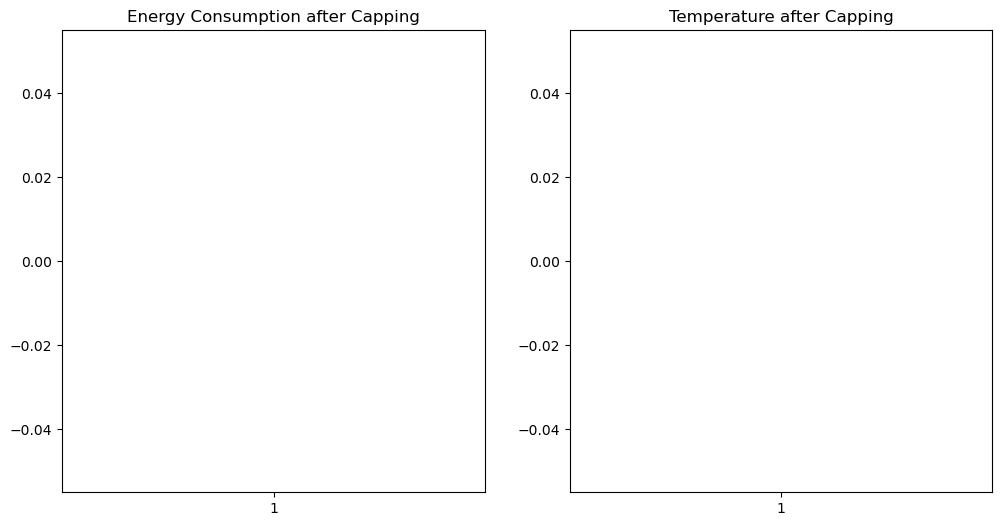

In [27]:
# Check the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Energy Consumption after Capping")
plt.boxplot(data['Energy_Consumption_kWh'])
plt.subplot(1, 2, 2)
plt.title("Temperature after Capping")
plt.boxplot(data['Temperature_C'])

plt.show()

In [28]:
# Optionally save the updated dataset
data.to_csv('handled_outliers_smart_home_energy_consumption.csv', index=False)

In [29]:
# Step 1: Check for Duplicate Timestamps
duplicates = data[data.duplicated(subset='Date', keep=False)]
print("Duplicate Timestamps:")
print(duplicates)

Duplicate Timestamps:
Empty DataFrame
Columns: [Date, Home_ID, City, Energy_Consumption_kWh, Occupancy, Temperature_C, Humidity_%, HVAC_Usage_kWh, Kitchen_Usage_kWh, Electronics_Usage_kWh, Log_Energy_Consumption]
Index: []


In [30]:
# Step 2: Corrected Duplicate Timestamps
if not duplicates.empty:
    # Aggregating duplicate timestamps by taking the mean of the numeric columns
    data = data.groupby('Date').agg({
        'Home_ID': 'first',  # Keep the first Home_ID
        'City': 'first',     # Keep the first City
        'Energy_Consumption_kWh': 'mean',
        'Occupancy': 'mean',
        'Temperature_C': 'mean',
        'Humidity_%': 'mean',
        'HVAC_Usage_kWh': 'mean',
        'Kitchen_Usage_kWh': 'mean',
        'Electronics_Usage_kWh': 'mean'
    }).reset_index()

    print("\nDuplicates were found and aggregated.")

In [31]:
# Step 3: Checked for Missing Time Intervals
# Setting Date as index for time-series analysis
data.set_index('Date', inplace=True)

In [32]:
# Checked for missing dates in the time series
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H')  # Assuming hourly frequency
missing_dates = date_range[~date_range.isin(data.index)]

if not missing_dates.empty:
    print("\nMissing Dates:")
    print(missing_dates)

    # Optionally, you can fill missing dates with interpolated values or forward fill
    for missing_date in missing_dates:
        data.loc[missing_date] = [None] * len(data.columns)  # Add missing date with NaN values

    data.sort_index(inplace=True)  # Sort by index after adding missing dates

    # Optionally forward fill or interpolate missing values
    data.fillna(method='ffill', inplace=True)  # Forward fill

In [33]:
# Step 4: Check final result
print("\nFinal Data after Handling Duplicates and Missing Dates:")
print(data.head())


Final Data after Handling Duplicates and Missing Dates:
                     Home_ID       City  Energy_Consumption_kWh  Occupancy  \
Date                                                                         
2024-03-14 06:00:00   Home_8    Lucknow                    3.14          1   
2024-04-06 06:00:00   Home_9  Hyderabad                    4.70          1   
2024-01-30 13:00:00   Home_4    Lucknow                    2.27          0   
2024-03-05 12:00:00   Home_5  Ahmedabad                    0.80          0   
2024-01-19 00:00:00  Home_10    Kolkata                    2.43          0   

                     Temperature_C  Humidity_%  HVAC_Usage_kWh  \
Date                                                             
2024-03-14 06:00:00          25.71       46.10            1.12   
2024-04-06 06:00:00          27.73       45.42            0.54   
2024-01-30 13:00:00          16.20       57.50           -0.22   
2024-03-05 12:00:00          23.30       58.46            2.15   


In [34]:

# Optionally save the cleaned dataset
data.to_csv('cleaned_time_series_smart_home_energy_consumption.csv')

In [35]:
# Select relevant features for normalization/standardization
features_to_normalize = [
    'Energy_Consumption_kWh',
    'HVAC_Usage_kWh',
    'Kitchen_Usage_kWh',
    'Electronics_Usage_kWh'
]

In [38]:
# Step 1: Normalize features using Min-Max Scaling
min_max_scaler = MinMaxScaler()
data[features_to_normalize] = min_max_scaler.fit_transform(data[features_to_normalize])

In [39]:
print("Normalized Features (Min-Max Scaling):")
print(data[features_to_normalize].head())

Normalized Features (Min-Max Scaling):
                     Energy_Consumption_kWh  HVAC_Usage_kWh  \
Date                                                          
2024-03-14 06:00:00                0.445552        0.600559   
2024-04-06 06:00:00                0.684816        0.438547   
2024-01-30 13:00:00                0.312117        0.226257   
2024-03-05 12:00:00                0.086656        0.888268   
2024-01-19 00:00:00                0.336656        0.748603   

                     Kitchen_Usage_kWh  Electronics_Usage_kWh  
Date                                                           
2024-03-14 06:00:00           0.547297               0.441315  
2024-04-06 06:00:00           0.709459               0.403756  
2024-01-30 13:00:00           0.290541               0.384977  
2024-03-05 12:00:00           0.496622               0.521127  
2024-01-19 00:00:00           0.310811               0.704225  


In [41]:
# Step 2: Standardize features using Z-score Standardization
standard_scaler = StandardScaler()
data[features_to_normalize] = standard_scaler.fit_transform(data[features_to_normalize])
print("\nStandardized Features (Z-score Standardization):")
print(data[features_to_normalize].head())


Standardized Features (Z-score Standardization):
                     Energy_Consumption_kWh  HVAC_Usage_kWh  \
Date                                                          
2024-03-14 06:00:00               -0.301778        0.218086   
2024-04-06 06:00:00                1.018711       -0.923015   
2024-01-30 13:00:00               -1.038204       -2.418250   
2024-03-05 12:00:00               -2.282511        2.244523   
2024-01-19 00:00:00               -0.902769        1.260816   

                     Kitchen_Usage_kWh  Electronics_Usage_kWh  
Date                                                           
2024-03-14 06:00:00           0.421238              -0.438693  
2024-04-06 06:00:00           1.606044              -0.707888  
2024-01-30 13:00:00          -1.454705              -0.842485  
2024-03-05 12:00:00           0.050986               0.133346  
2024-01-19 00:00:00          -1.306604               1.445670  


In [42]:
# Optionally save the normalized and standardized dataset
data.to_csv('normalized_standardized_smart_home_energy_consumption.csv', index=False)

In [43]:
# Summary Statistics for key features
key_features = ['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']
summary_statistics = data[key_features].describe()
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
       Energy_Consumption_kWh  Temperature_C  HVAC_Usage_kWh  \
count            2.450000e+03    2450.000000    2.450000e+03   
mean             3.045183e-17      23.938187   -2.320140e-17   
std              1.000204e+00       5.178042    1.000204e+00   
min             -2.760765e+00       9.906250   -4.011856e+00   
25%             -6.911526e-01      20.432500   -6.672508e-01   
50%              2.950543e-03      23.910000    2.134445e-02   
75%              6.885890e-01      27.450000    6.902656e-01   
max              2.758201e+00      37.976250    3.031490e+00   

       Kitchen_Usage_kWh  Electronics_Usage_kWh  
count       2.500000e+03           2.500000e+03  
mean        2.842171e-18          -1.278977e-17  
std         1.000200e+00           1.000200e+00  
min        -3.577483e+00          -3.601732e+00  
25%        -6.895177e-01          -6.742387e-01  
50%         2.630270e-02          -1.251756e-03  
75%         6.927561e-01           6.717351e-01  
max

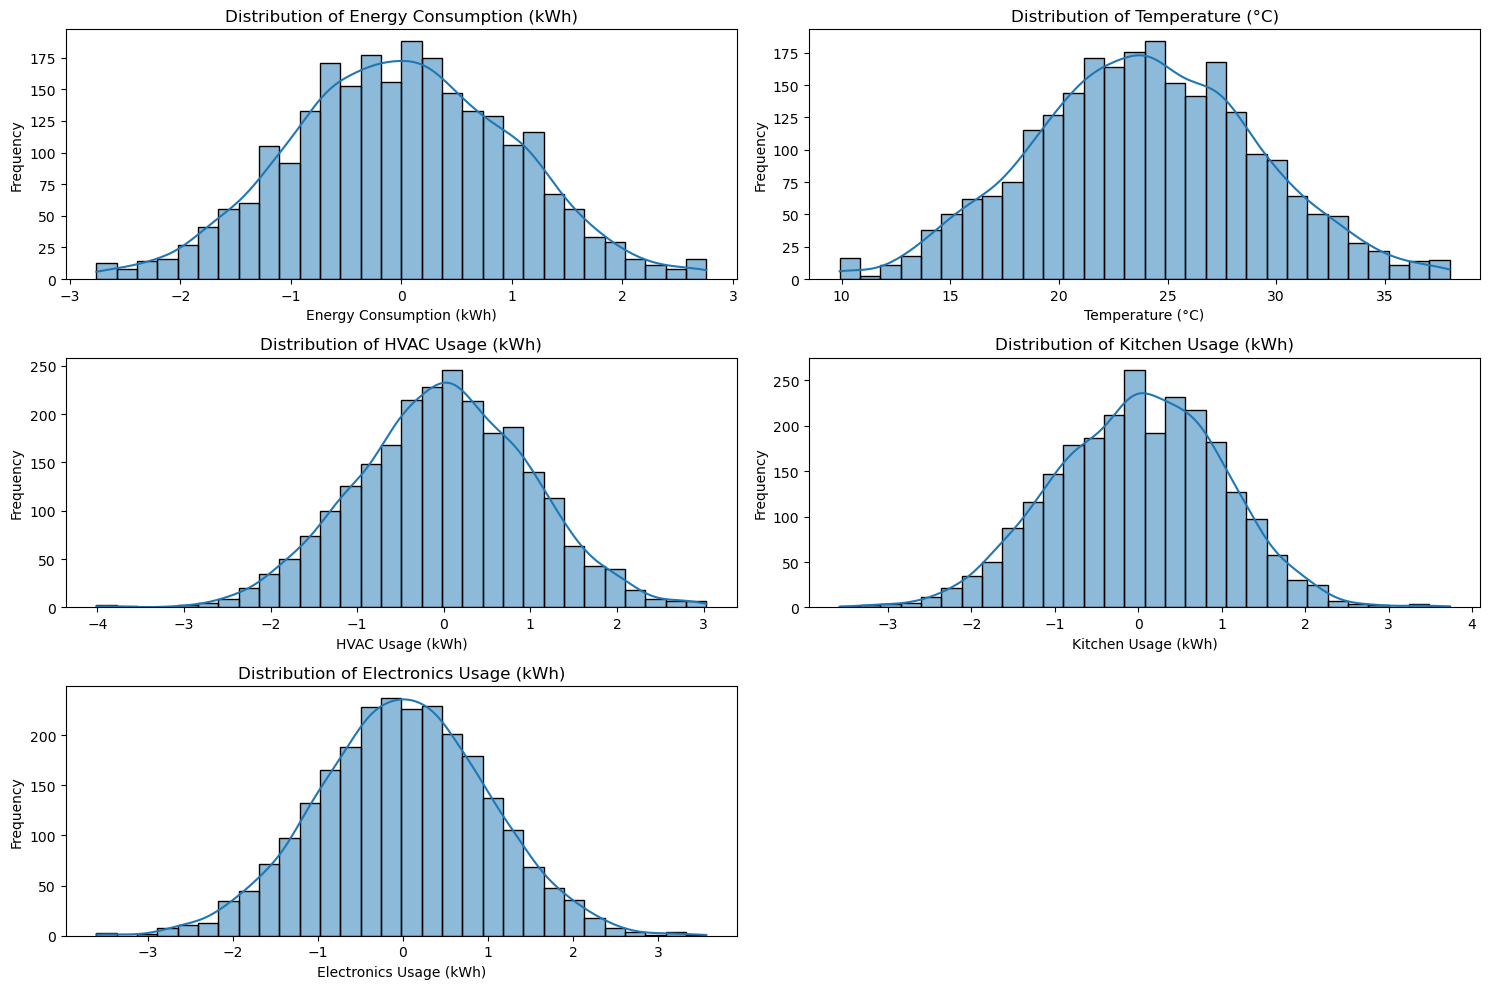

In [44]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Histogram for Energy Consumption
plt.subplot(3, 2, 1)
sns.histplot(data['Energy_Consumption_kWh'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')

# Histogram for Temperature
plt.subplot(3, 2, 2)
sns.histplot(data['Temperature_C'], bins=30, kde=True)
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for HVAC Usage
plt.subplot(3, 2, 3)
sns.histplot(data['HVAC_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of HVAC Usage (kWh)')
plt.xlabel('HVAC Usage (kWh)')
plt.ylabel('Frequency')

# Histogram for Kitchen Usage
plt.subplot(3, 2, 4)
sns.histplot(data['Kitchen_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Kitchen Usage (kWh)')
plt.xlabel('Kitchen Usage (kWh)')
plt.ylabel('Frequency')

# Histogram for Electronics Usage
plt.subplot(3, 2, 5)
sns.histplot(data['Electronics_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Electronics Usage (kWh)')
plt.xlabel('Electronics Usage (kWh)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


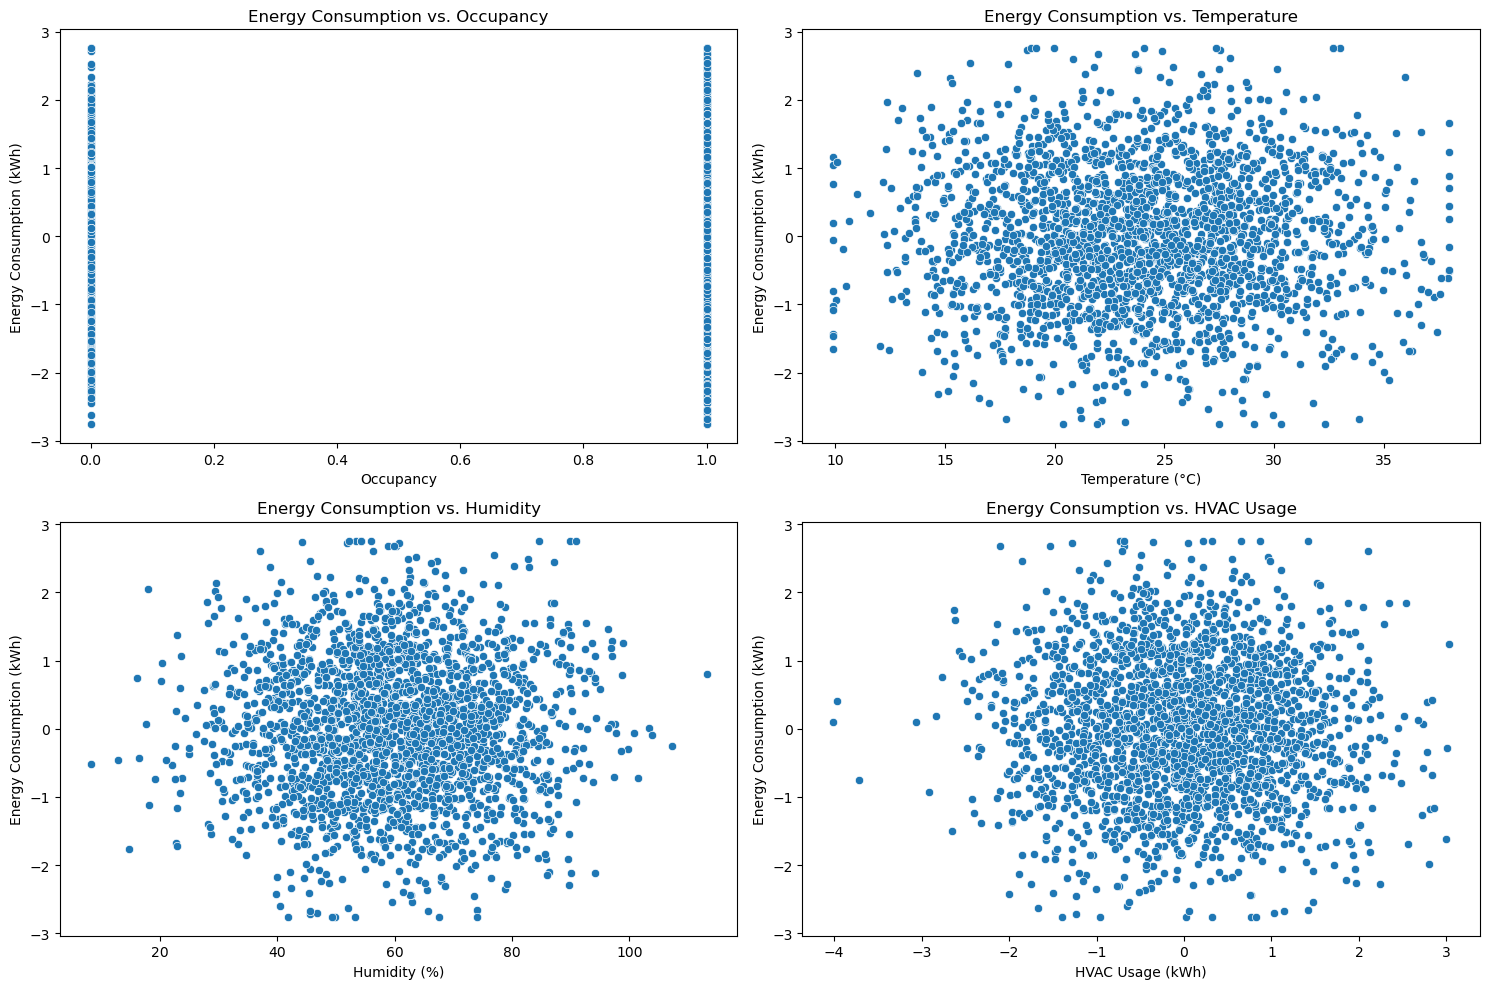

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Scatter Plot: Energy Consumption vs. Occupancy
plt.subplot(2, 2, 1)
sns.scatterplot(x='Occupancy', y='Energy_Consumption_kWh', data=data)
plt.title('Energy Consumption vs. Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Energy Consumption (kWh)')

# Scatter Plot: Energy Consumption vs. Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(x='Temperature_C', y='Energy_Consumption_kWh', data=data)
plt.title('Energy Consumption vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')

# Scatter Plot: Energy Consumption vs. Humidity
plt.subplot(2, 2, 3)
sns.scatterplot(x='Humidity_%', y='Energy_Consumption_kWh', data=data)
plt.title('Energy Consumption vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption (kWh)')

# Scatter Plot: Energy Consumption vs. HVAC Usage
plt.subplot(2, 2, 4)
sns.scatterplot(x='HVAC_Usage_kWh', y='Energy_Consumption_kWh', data=data)
plt.title('Energy Consumption vs. HVAC Usage')
plt.xlabel('HVAC Usage (kWh)')
plt.ylabel('Energy Consumption (kWh)')

plt.tight_layout()
plt.show()


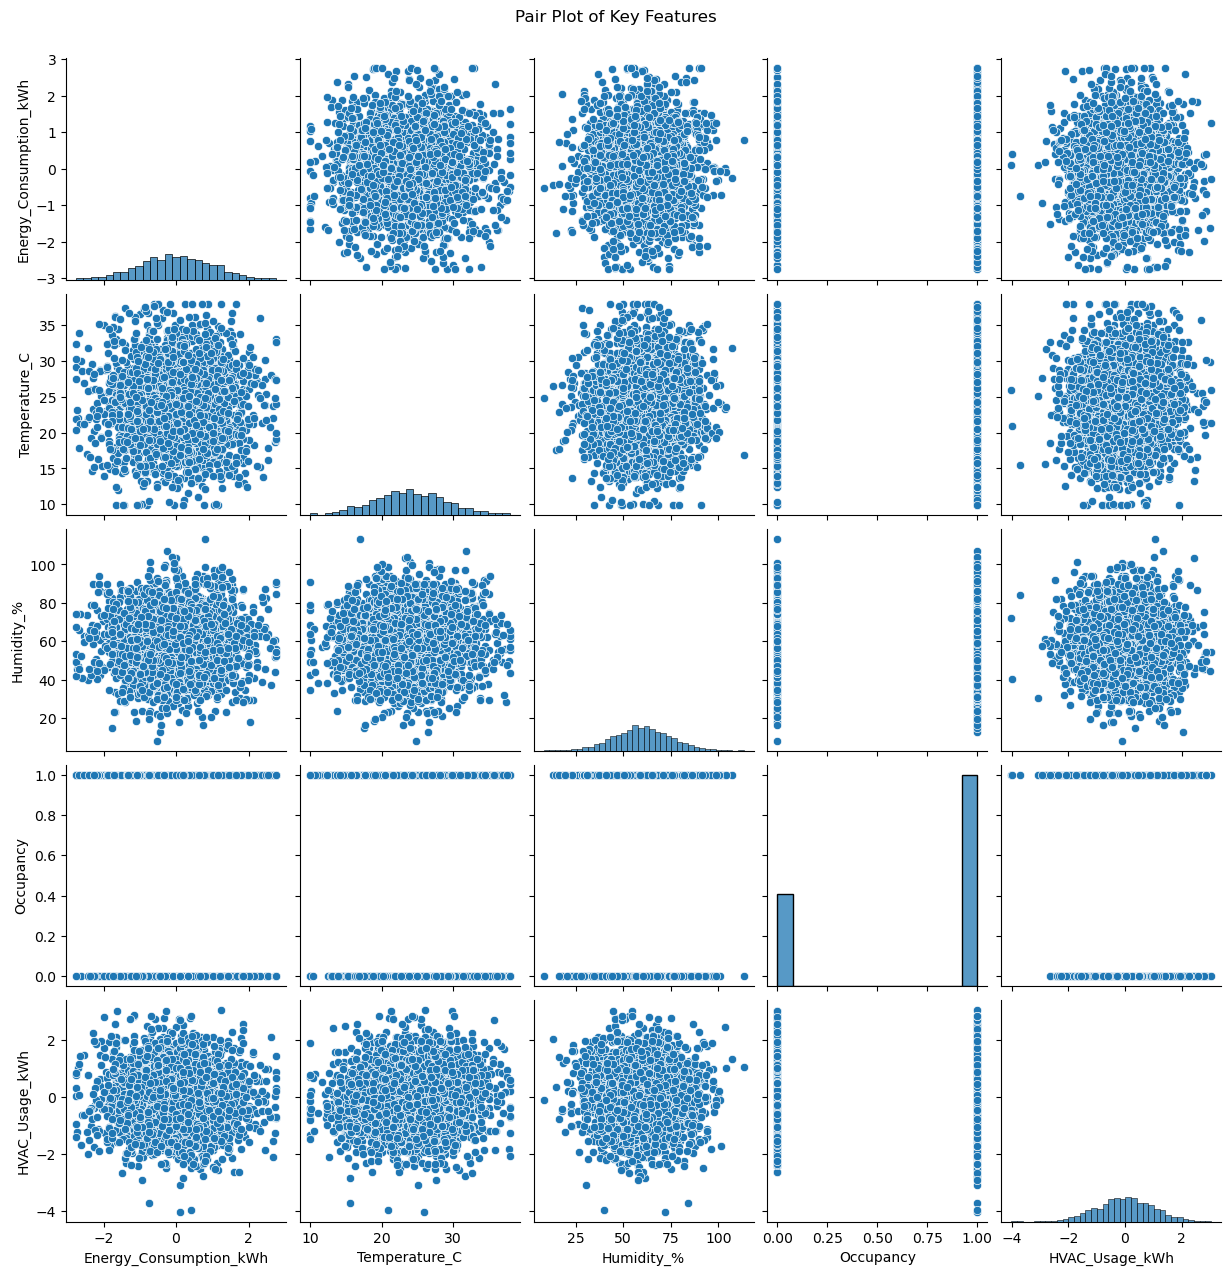

In [46]:
# Select relevant features for the pairplot
features_for_pairplot = ['Energy_Consumption_kWh', 'Temperature_C', 'Humidity_%', 'Occupancy', 'HVAC_Usage_kWh']
sns.pairplot(data[features_for_pairplot])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


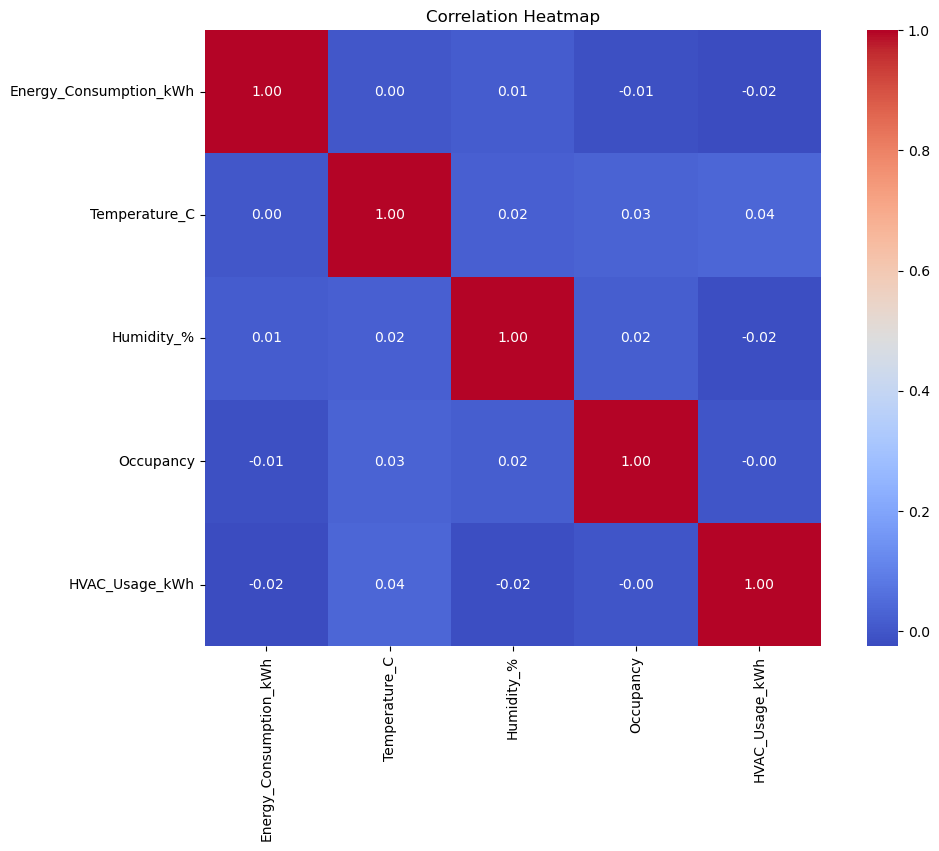

In [47]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[features_for_pairplot].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [55]:
# Check the structure of the DataFrame
print("Column Names:")
print(data.columns)

print("\nFirst Few Rows:")
print(data.head())

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure the date column is in datetime format and set as index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
else:
    print("Date column not found. Please check the column names.")


Column Names:
Index(['Home_ID', 'City', 'Energy_Consumption_kWh', 'Occupancy',
       'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh',
       'Electronics_Usage_kWh', 'Log_Energy_Consumption'],
      dtype='object')

First Few Rows:
                     Home_ID       City  Energy_Consumption_kWh  Occupancy  \
Date                                                                         
2024-03-14 06:00:00   Home_8    Lucknow               -0.301778          1   
2024-04-06 06:00:00   Home_9  Hyderabad                1.018711          1   
2024-01-30 13:00:00   Home_4    Lucknow               -1.038204          0   
2024-03-05 12:00:00   Home_5  Ahmedabad               -2.282511          0   
2024-01-19 00:00:00  Home_10    Kolkata               -0.902769          0   

                     Temperature_C  Humidity_%  HVAC_Usage_kWh  \
Date                                                             
2024-03-14 06:00:00          25.71       46.10        0.218086   
2

In [58]:
# Create a synthetic date column assuming hourly intervals starting from a certain date
# Adjust 'start' and 'periods' according to your dataset's size
data['Date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='H')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Display the first few rows to confirm the changes
print(data.head())

                     Home_ID       City  Energy_Consumption_kWh  Occupancy  \
Date                                                                         
2023-01-01 00:00:00   Home_8    Lucknow               -0.301778          1   
2023-01-01 01:00:00   Home_9  Hyderabad                1.018711          1   
2023-01-01 02:00:00   Home_4    Lucknow               -1.038204          0   
2023-01-01 03:00:00   Home_5  Ahmedabad               -2.282511          0   
2023-01-01 04:00:00  Home_10    Kolkata               -0.902769          0   

                     Temperature_C  Humidity_%  HVAC_Usage_kWh  \
Date                                                             
2023-01-01 00:00:00          25.71       46.10        0.218086   
2023-01-01 01:00:00          27.73       45.42       -0.923015   
2023-01-01 02:00:00          16.20       57.50       -2.418250   
2023-01-01 03:00:00          23.30       58.46        2.244523   
2023-01-01 04:00:00          21.18       84.52        1.2

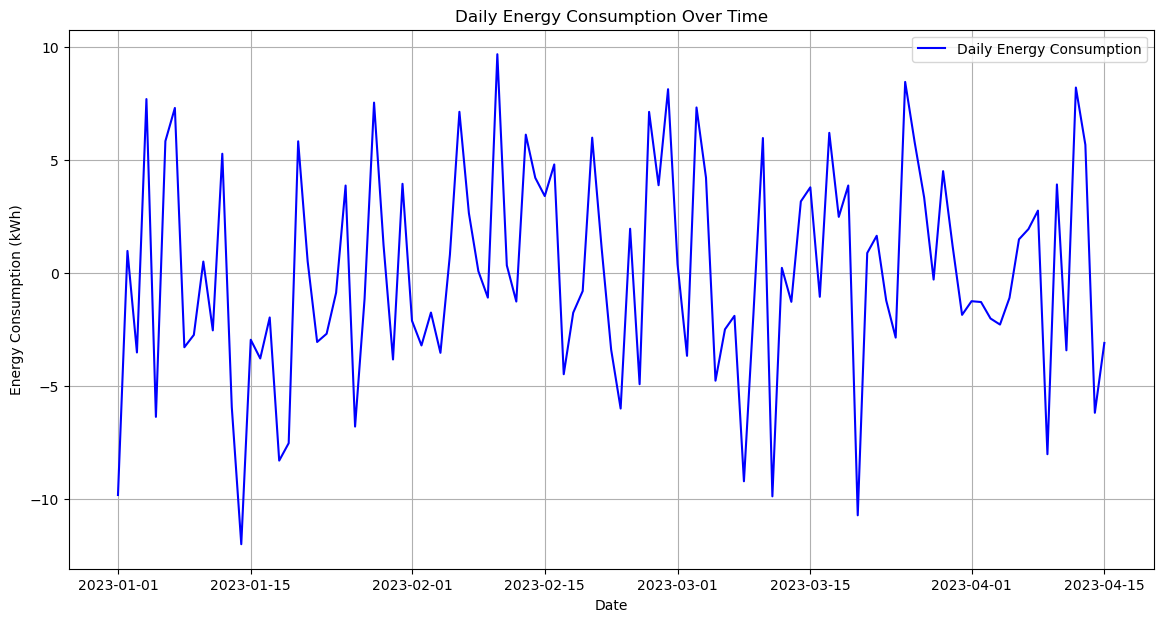

In [60]:
# Daily Energy Consumption
daily_energy_consumption = data.resample('D')['Energy_Consumption_kWh'].sum()

# Plotting daily energy consumption
plt.figure(figsize=(14, 7))
plt.plot(daily_energy_consumption, color='blue', label='Daily Energy Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()


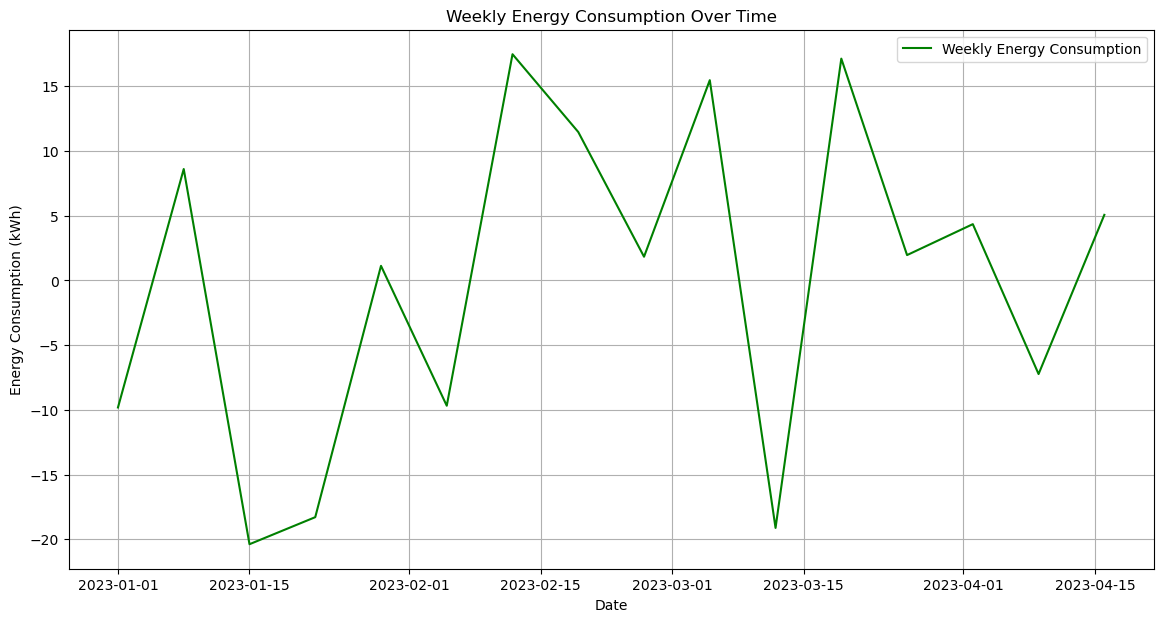

In [61]:
# Weekly Energy Consumption
weekly_energy_consumption = data.resample('W')['Energy_Consumption_kWh'].sum()

# Plotting weekly energy consumption
plt.figure(figsize=(14, 7))
plt.plot(weekly_energy_consumption, color='green', label='Weekly Energy Consumption')
plt.title('Weekly Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()


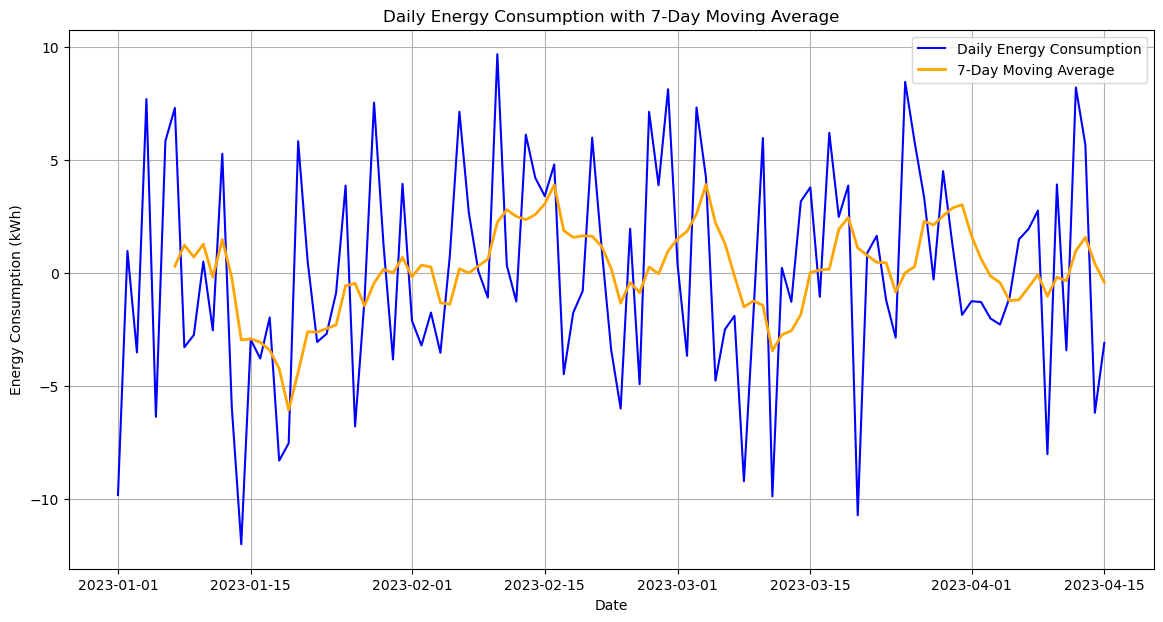

In [62]:
# Calculate moving averages
daily_energy_consumption_ma = daily_energy_consumption.rolling(window=7).mean()

# Plotting daily energy consumption with moving average
plt.figure(figsize=(14, 7))
plt.plot(daily_energy_consumption, color='blue', label='Daily Energy Consumption')
plt.plot(daily_energy_consumption_ma, color='orange', label='7-Day Moving Average', linewidth=2)
plt.title('Daily Energy Consumption with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()


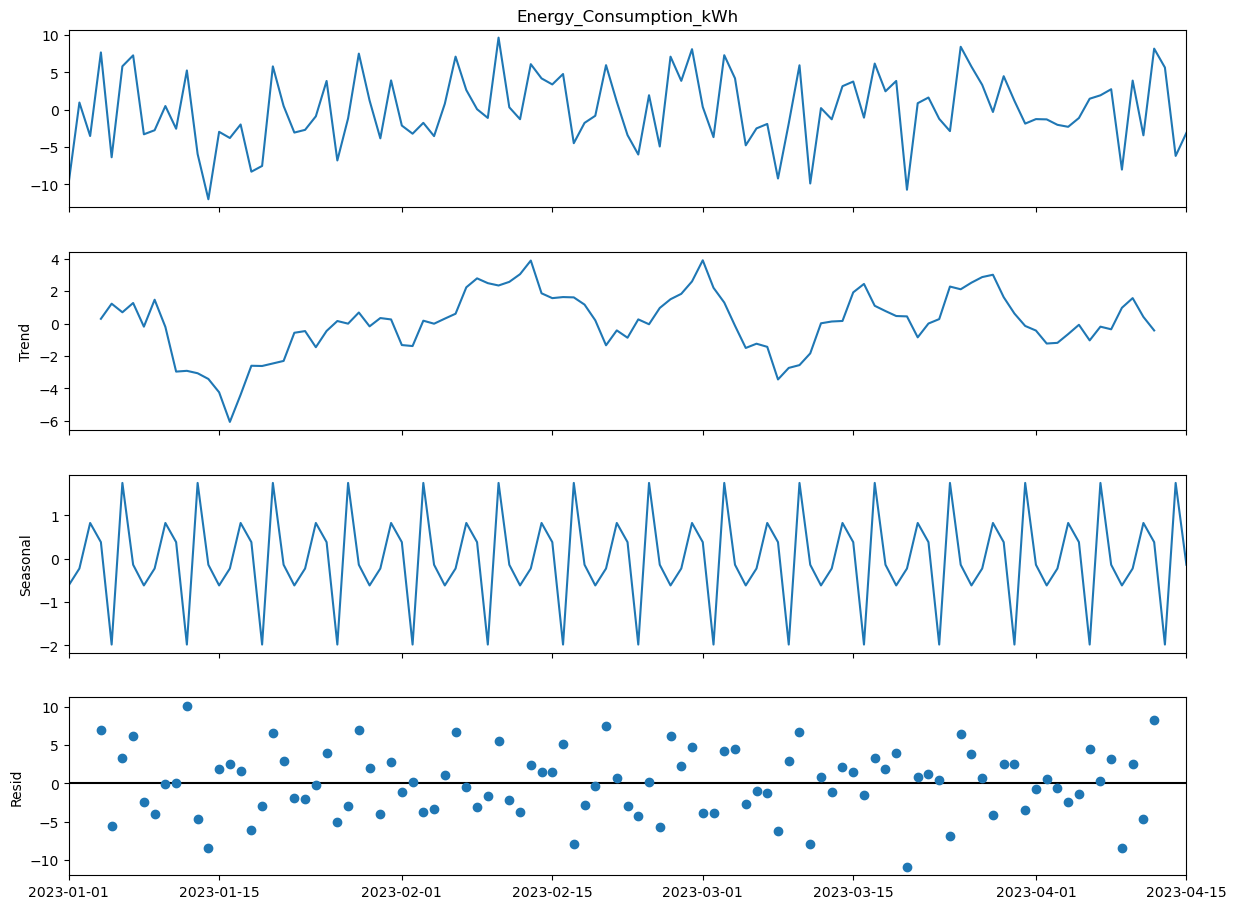

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_energy_consumption, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


In [65]:
# Create new feature: Energy Consumption per Occupant
data['Energy_per_Occupant_kWh'] = data['Energy_Consumption_kWh'] / data['Occupancy']
# Handle any potential division by zero errors (e.g., occupancy = 0)
data['Energy_per_Occupant_kWh'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Create new feature: Temperature difference from a reference value (e.g., 20°C)
reference_temperature = 20  # You can change this as needed
data['Temp_Difference'] = data['Temperature_C'] - reference_temperature

# Display the new features
print(data[['Energy_per_Occupant_kWh', 'Temp_Difference']].head())

                     Energy_per_Occupant_kWh  Temp_Difference
Date                                                         
2023-01-01 00:00:00                -0.301778             5.71
2023-01-01 01:00:00                 1.018711             7.73
2023-01-01 02:00:00                 0.000000            -3.80
2023-01-01 03:00:00                 0.000000             3.30
2023-01-01 04:00:00                 0.000000             1.18


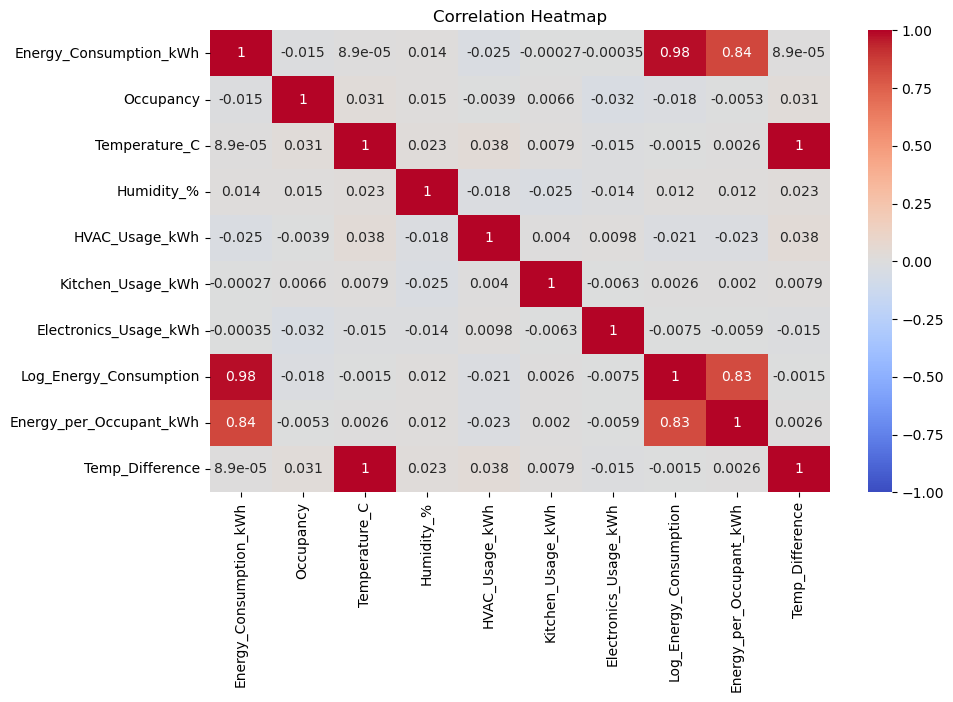

In [67]:
# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix for the numeric columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

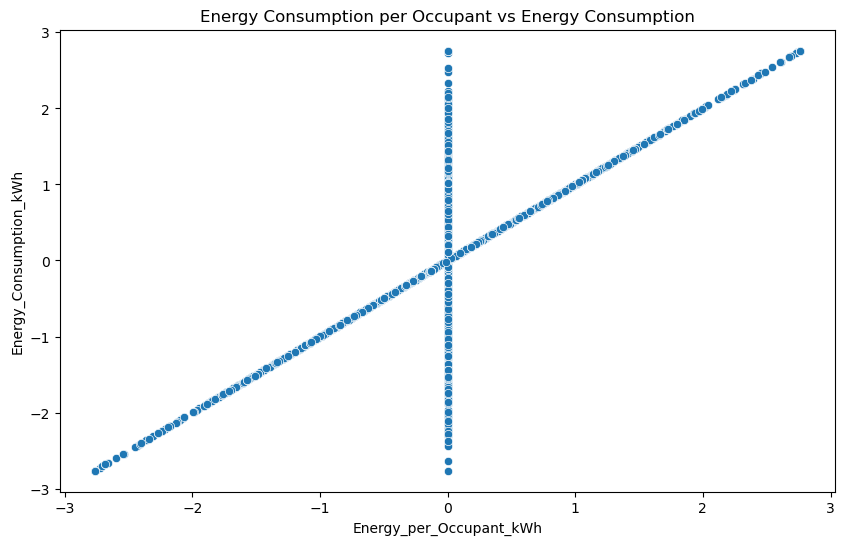

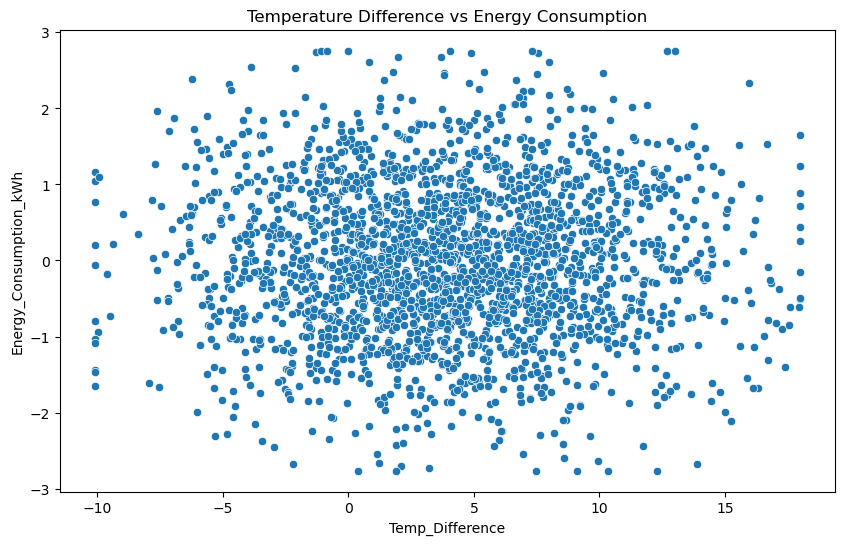

In [68]:
# Scatter plot: Energy Consumption per Occupant vs Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy_per_Occupant_kWh', y='Energy_Consumption_kWh', data=data)
plt.title("Energy Consumption per Occupant vs Energy Consumption")
plt.show()

# Scatter plot: Temperature Difference vs Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_Difference', y='Energy_Consumption_kWh', data=data)
plt.title("Temperature Difference vs Energy Consumption")
plt.show()


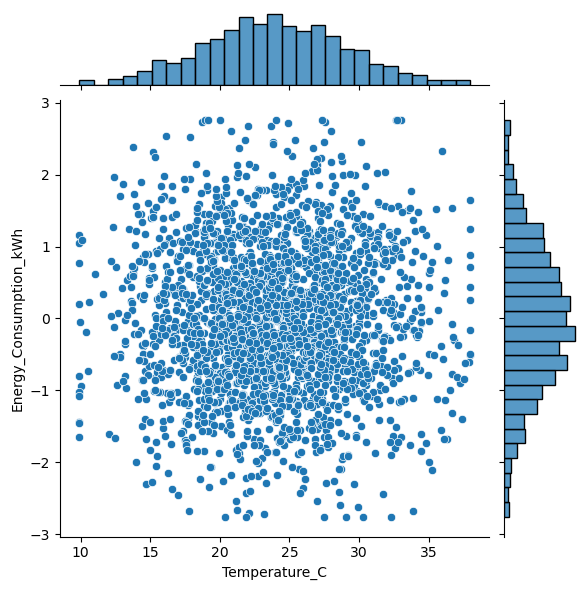

In [69]:
# Joint plot to explore the relationship between temperature and energy consumption
sns.jointplot(x='Temperature_C', y='Energy_Consumption_kWh', data=data, kind='scatter')
plt.show()

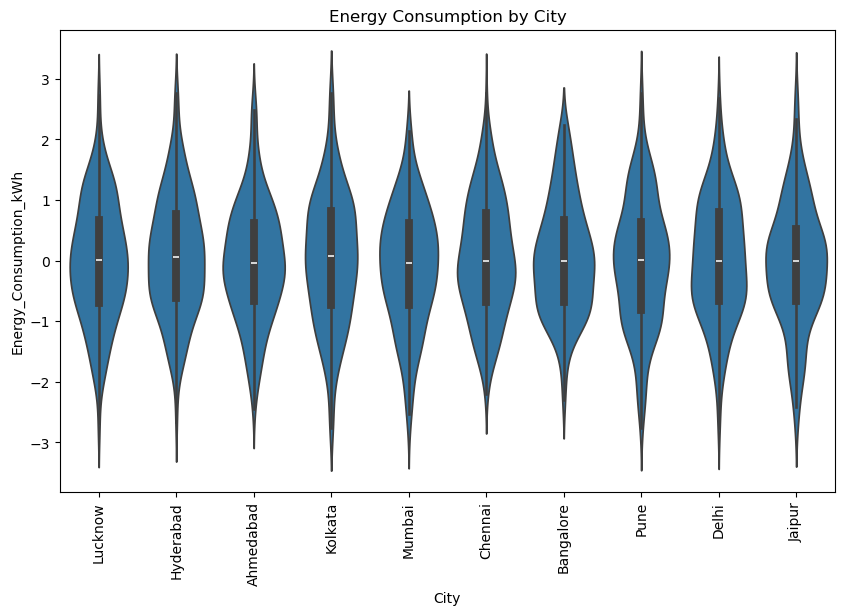

In [70]:
# Violin plot to compare energy consumption across different cities
plt.figure(figsize=(10, 6))
sns.violinplot(x='City', y='Energy_Consumption_kWh', data=data)
plt.xticks(rotation=90)
plt.title("Energy Consumption by City")
plt.show()


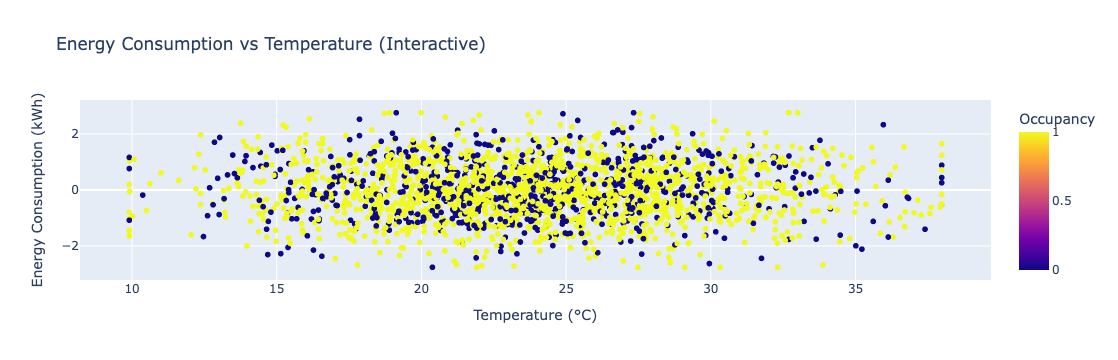

In [71]:
import plotly.express as px

# Interactive scatter plot for temperature vs energy consumption with color representing occupancy
fig = px.scatter(data, x='Temperature_C', y='Energy_Consumption_kWh', color='Occupancy',
                 title='Energy Consumption vs Temperature (Interactive)', 
                 labels={'Temperature_C': 'Temperature (°C)', 'Energy_Consumption_kWh': 'Energy Consumption (kWh)'})
fig.show()


In [72]:
from sklearn.model_selection import train_test_split

# Assuming the data is already sorted by the 'Date' column
# Step 1: Define the proportion for splitting (80% for training, 20% for testing)
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

# Step 2: Split the dataset into training and testing sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Display the shape of the resulting datasets
print("Training set size:", train_data.shape)
print("Testing set size:", test_data.shape)


Training set size: (2000, 12)
Testing set size: (500, 12)


In [74]:
# Step 1: Drop rows with missing values
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()

# Step 2: Define features and target
X_train = train_data_cleaned[features]
y_train = train_data_cleaned[target]

X_test = test_data_cleaned[features]
y_test = test_data_cleaned[target]

# Step 3: Train and evaluate the model as before
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 1.03
R-squared (R2): -0.01


In [76]:
# Remove rows where y_train is NaN
non_nan_indices = ~np.isnan(y_train)
X_train_cleaned = X_train_imputed[non_nan_indices]
y_train_cleaned = y_train[non_nan_indices]

# Fit the model with cleaned data
model = LinearRegression()
model.fit(X_train_cleaned, y_train_cleaned)


LinearRegression()

In [78]:
# Convert y_train to a NumPy array before reshaping
y_train_array = y_train.values

# Impute missing values in y_train using the median (or mean, if appropriate)
imputer = SimpleImputer(strategy='median')
y_train_imputed = imputer.fit_transform(y_train_array.reshape(-1, 1)).ravel()

# Fit the model with the imputed target variable
model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)


LinearRegression()

In [80]:
# Check for NaN values in y_test
print(f"Number of NaN values in y_test: {y_test.isnull().sum()}")


Number of NaN values in y_test: 11


In [81]:
# Check for NaN values in y_pred
print(f"Number of NaN values in y_pred: {np.isnan(y_pred).sum()}")


Number of NaN values in y_pred: 0


In [82]:
# Impute missing values in y_test if needed
imputer = SimpleImputer(strategy='median')
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()


In [83]:
# Re-predict after confirming no NaN values
y_pred = model.predict(X_test_imputed)


In [84]:
# Re-calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_imputed, y_pred)

# Re-calculate R-squared (R²)
r_squared = r2_score(y_test_imputed, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")


Mean Absolute Error (MAE): 0.78
R-squared (R²): -0.01


                 Feature  Coefficient  Absolute Coefficient
3         HVAC_Usage_kWh    -0.041101              0.041101
0              Occupancy    -0.027748              0.027748
5  Electronics_Usage_kWh     0.006747              0.006747
4      Kitchen_Usage_kWh     0.003412              0.003412
1          Temperature_C    -0.001389              0.001389
2             Humidity_%     0.001309              0.001309


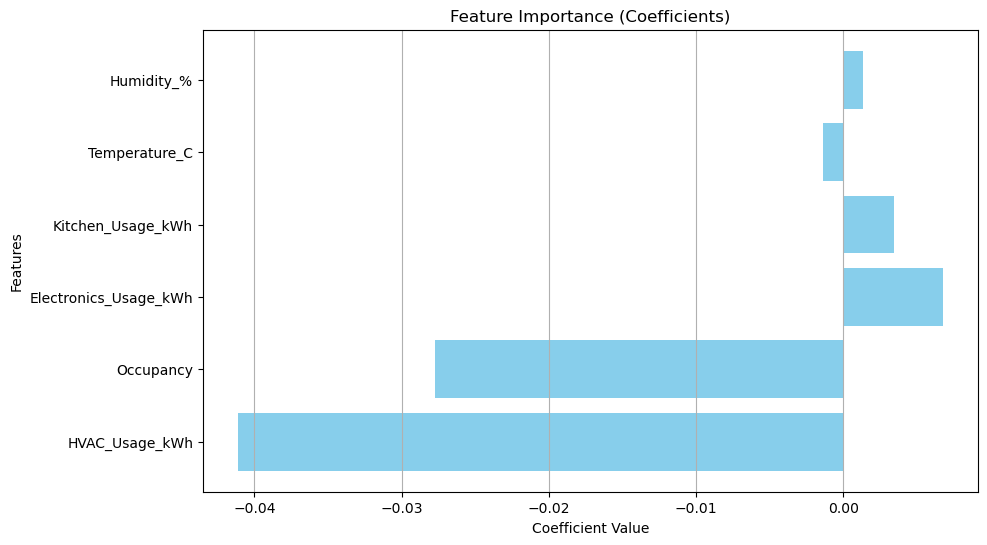

In [86]:
# Assuming 'model' is your trained linear regression model
# Assuming 'X_train_imputed' is your imputed training features as a NumPy array
# Replace 'feature_names' with your original feature names from the DataFrame

# For example, if X_train was originally a DataFrame, you can extract its columns:
feature_names = X_train.columns  # if you have access to the original DataFrame

# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display feature importance
print(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

y_test contains NaN values.
Mean Absolute Error (MAE): 0.7977468035187467
R-squared (R²): -0.007684145063341807


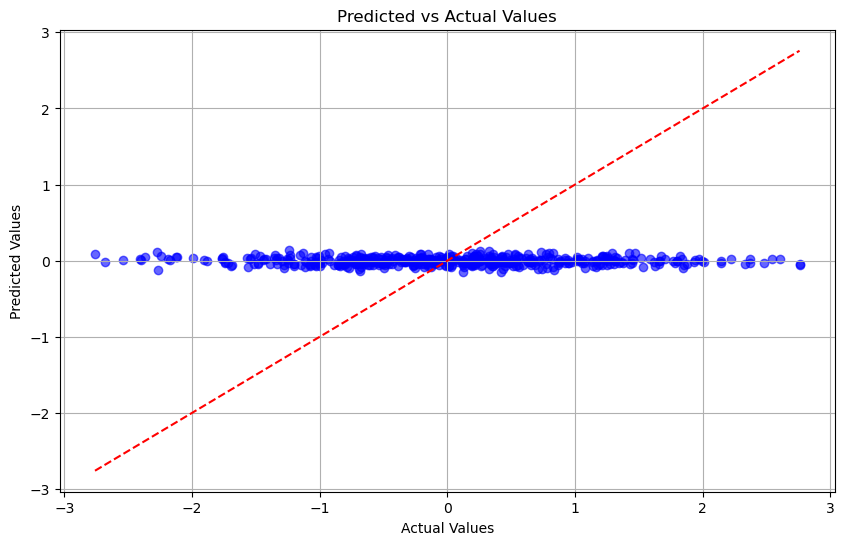

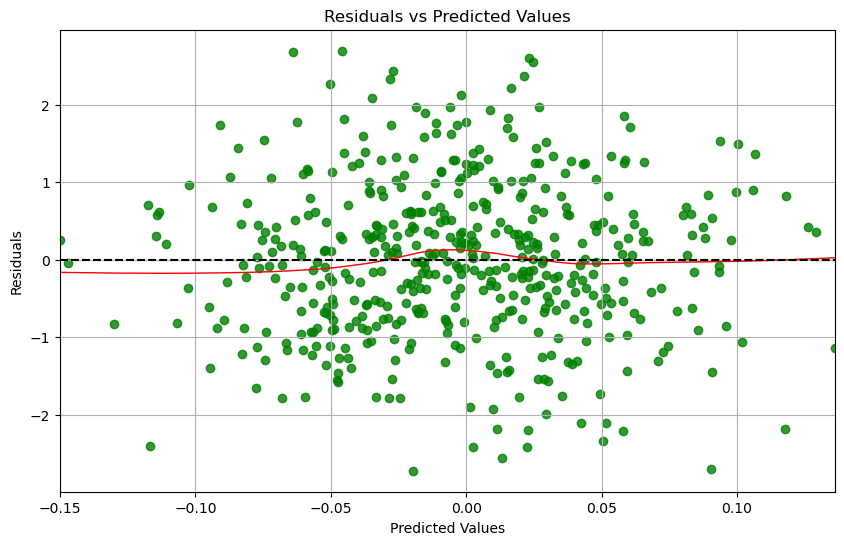

In [89]:
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Make Predictions
y_pred = model.predict(X_test_imputed)  # Use the imputed test set for predictions

# Check for NaN values in y_test and y_pred
if np.isnan(y_test).any():
    print("y_test contains NaN values.")
if np.isnan(y_pred).any():
    print("y_pred contains NaN values.")

# Optionally, drop NaN values if found in actual values or predictions
# Combine actual values and predictions into a DataFrame to facilitate NaN removal
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Drop rows where either Actual or Predicted is NaN
results_df.dropna(inplace=True)

# Separate the cleaned actual and predicted values
y_test_cleaned = results_df['Actual']
y_pred_cleaned = results_df['Predicted']

# Step 2: Calculate Evaluation Metrics on cleaned data
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
r_squared = r2_score(y_test_cleaned, y_pred_cleaned)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r_squared}')

# Step 3: Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, color='blue', alpha=0.6)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], 
         [y_test_cleaned.min(), y_test_cleaned.max()], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Step 4: Residual Analysis
residuals = y_test_cleaned - y_pred_cleaned

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_cleaned, y=residuals, lowess=True, color='g', 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(y=0, linestyle='--', color='black')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()